Plot the BST 1s NenuFAR data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import glob
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
from nenupy.io.bst import BST
import astropy.units as u

# set the directory path where the data is stored
machine = 'nancep' # dias or nancep

if machine=='nancep': # on nancep node
    home_folder = '/home/mnedal'
    data_dir = '/databf/nenufar/LT11'

2025-05-19 13:13:45 | INFO: NenuFAR antenna model (polarization=NW) loaded.
2025-05-19 13:13:45 | INFO: NenuFAR antenna model (polarization=NE) loaded.


## Read the file path

In [2]:
mydate = '20250325'

year, month, day = mydate[:4], mydate[4:6], mydate[6:]
filenames = sorted(glob.glob(f'{data_dir}/{year}/{month}/{mydate}*_SUN_TRACKING/{mydate}*_BST.fits'))
print(filenames)

['/databf/nenufar/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/20250325_091200_BST.fits']


## Load the data file

In [3]:
bst = BST(filenames[0])
bst.info()

file: '/databf/nenufar/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/20250325_091200_BST.fits'
frequency (320,): 21.6796875 MHz -- 83.984375 MHz
time (20200,): 2025-03-25T09:13:10.000 -- 2025-03-25T14:49:49.000
data: (20200, 2, 768)


2025-05-19 13:13:45 | INFO: BST selection applied
	- time (20199,): '>=2025-03-25T09:13:10.000 & <= 2025-03-25T14:49:49.000'
	- frequency (320,): '>=21.6796875 MHz & <= 83.984375 MHz'
	- polarization (1,): 'NW'
	- beam (1,): 0


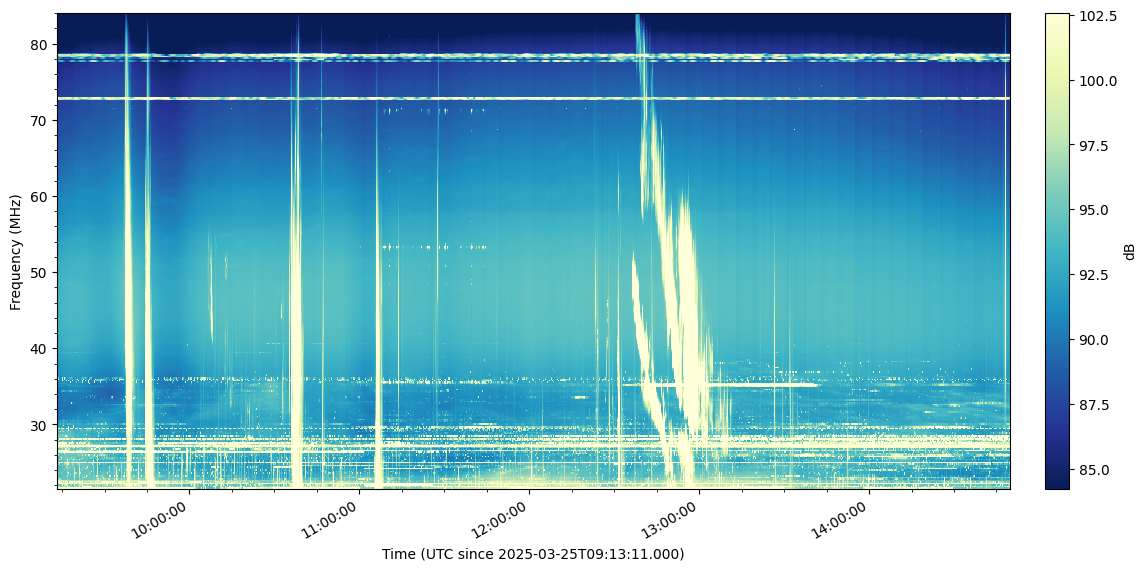

In [4]:
data = bst.get()
data.plot()

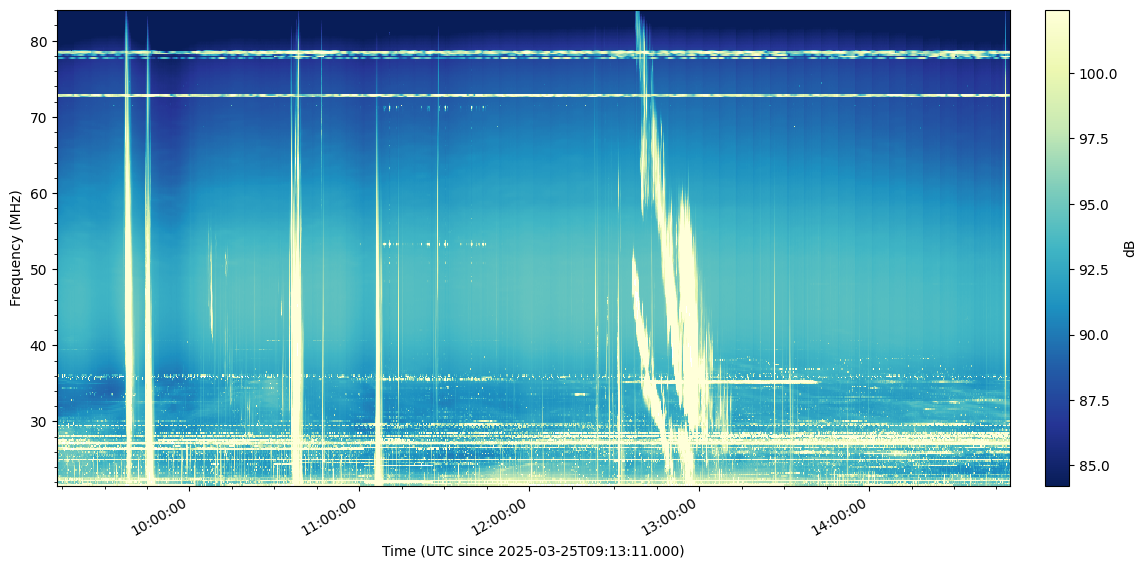

In [6]:
cleaned_data = data.clean_rfi(t_sigma=10, f_sigma=10)
cleaned_data.plot()

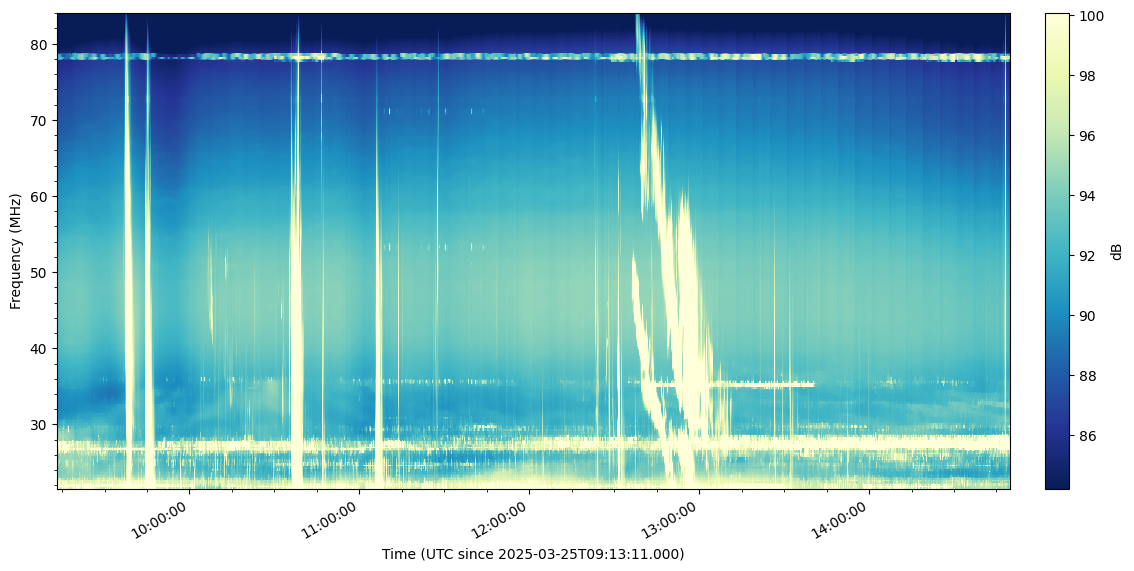

In [5]:
filtered_data = data.median_filter(filter_size=5)
filtered_data.plot()

In [12]:
data_nobkg = data.value - np.tile(np.median(data.value,0), (data.value.shape[0],1))

In [16]:
data.frequency

<Quantity [21.679688, 21.875   , 22.070312, 22.265625, 22.460938,
           22.65625 , 22.851562, 23.046875, 23.242188, 23.4375  ,
           23.632812, 23.828125, 24.023438, 24.21875 , 24.414062,
           24.609375, 24.804688, 25.      , 25.195312, 25.390625,
           25.585938, 25.78125 , 25.976562, 26.171875, 26.367188,
           26.5625  , 26.757812, 26.953125, 27.148438, 27.34375 ,
           27.539062, 27.734375, 27.929688, 28.125   , 28.320312,
           28.515625, 28.710938, 28.90625 , 29.101562, 29.296875,
           29.492188, 29.6875  , 29.882812, 30.078125, 30.273438,
           30.46875 , 30.664062, 30.859375, 31.054688, 31.25    ,
           31.445312, 31.640625, 31.835938, 32.03125 , 32.226562,
           32.421875, 32.617188, 32.8125  , 33.007812, 33.203125,
           33.398438, 33.59375 , 33.789062, 33.984375, 34.179688,
           34.375   , 34.570312, 34.765625, 34.960938, 35.15625 ,
           35.351562, 35.546875, 35.742188, 35.9375  , 36.132812,
          

In [23]:
data.time.to_datetime()

array([datetime.datetime(2025, 3, 25, 9, 13, 11, 15),
       datetime.datetime(2025, 3, 25, 9, 13, 12, 9),
       datetime.datetime(2025, 3, 25, 9, 13, 13, 4), ...,
       datetime.datetime(2025, 3, 25, 14, 49, 46, 999986),
       datetime.datetime(2025, 3, 25, 14, 49, 48, 20),
       datetime.datetime(2025, 3, 25, 14, 49, 49, 15)], dtype=object)

array([datetime.datetime(2025, 3, 25, 9, 13, 11, 15),
       datetime.datetime(2025, 3, 25, 9, 13, 12, 9),
       datetime.datetime(2025, 3, 25, 9, 13, 13, 4), ...,
       datetime.datetime(2025, 3, 25, 14, 49, 46, 999986),
       datetime.datetime(2025, 3, 25, 14, 49, 48, 20),
       datetime.datetime(2025, 3, 25, 14, 49, 49, 15)], dtype=object)

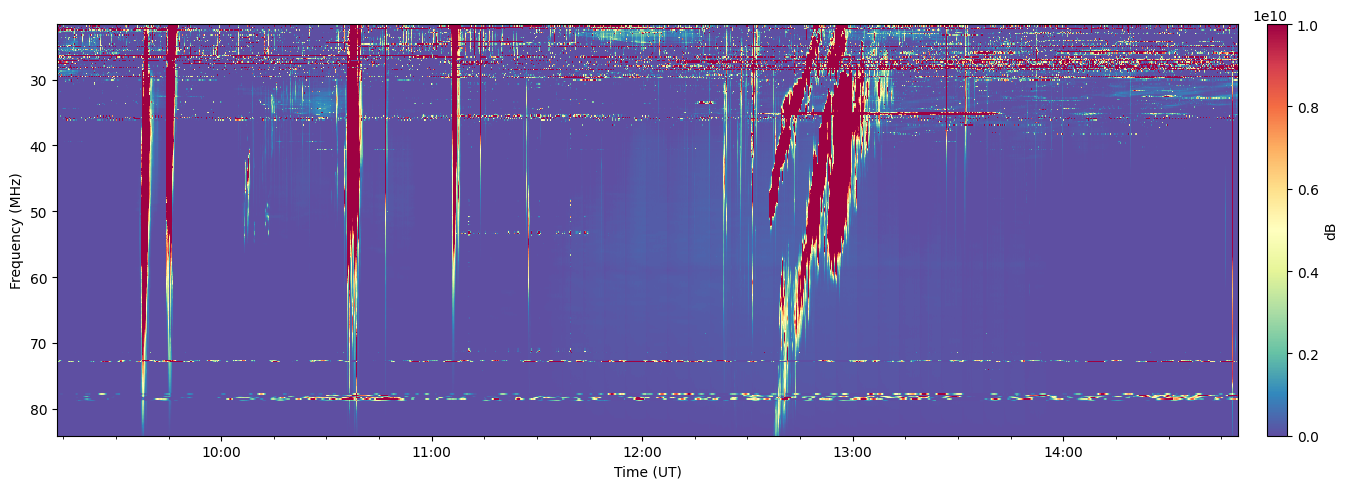

In [42]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(data.time.datetime, data.frequency.value, data_nobkg.T,
                   vmin=0, vmax=1e10,
                   cmap='Spectral_r')
fig.colorbar(pc, ax=ax, pad=0.02, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_minor_locator(AutoMinorLocator(n=4))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

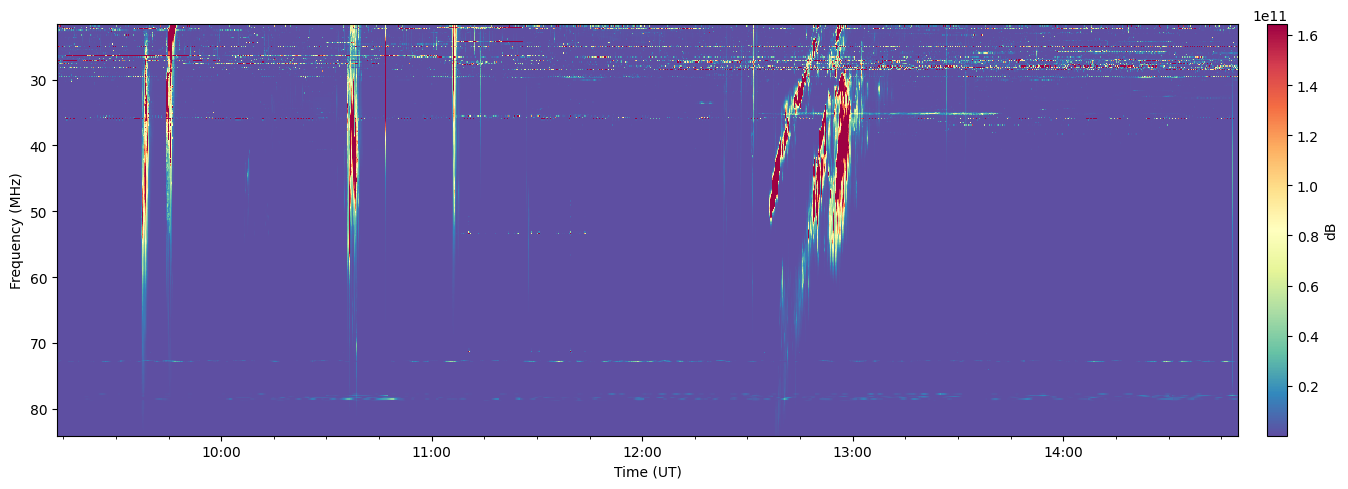

In [50]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(data.time.datetime, data.frequency.value, data_nobkg.T,
                   # norm=LogNorm(vmin=np.nanpercentile(data.value, 10), vmax=np.nanpercentile(data.value, 97)),
                   vmin=np.nanpercentile(data.value, 1), vmax=np.nanpercentile(data.value, 99),
                   cmap='Spectral_r')
fig.colorbar(pc, ax=ax, pad=0.02, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_minor_locator(AutoMinorLocator(n=4))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [57]:
np.nanpercentile(data.value, [1,99])

array([1.17740214e+08, 1.64265722e+11])

In [71]:
print(f'{np.nanmax(data.value):.2e}')
print(f'{np.nanstd(data.value):.2e}')
print(f'{np.nanmax(data.value)-np.nanstd(data.value):.2e}')

7.65e+13
1.15e+11
7.64e+13


In [60]:
print(f'{np.nanmax(data.value):.2e} - {np.nanmin(data.value):.2e}')

7.65e+13 - 5.90e+07


In [62]:
vmin = np.mean(data.value)-2 * np.std(data.value)
vmax = np.mean(data.value)+3 * np.std(data.value)
print(f'{vmin:.2e} - {vmax:.2e}')

-2.21e+11 - 3.56e+11


In [93]:
vmin, vmax = np.nanpercentile(data.value, [1, 99.7])
print(f'{vmax:.2e} - {vmin:.2e}')

5.14e+11 - 1.18e+08


In [92]:
vmax = np.nanmean(data.value)+2 * np.nanstd(data.value)
vmin = np.nanmean(data.value)-2 * np.nanstd(data.value)
print(f'{vmax:.2e} - {vmin:.2e}')

2.41e+11 - -2.21e+11


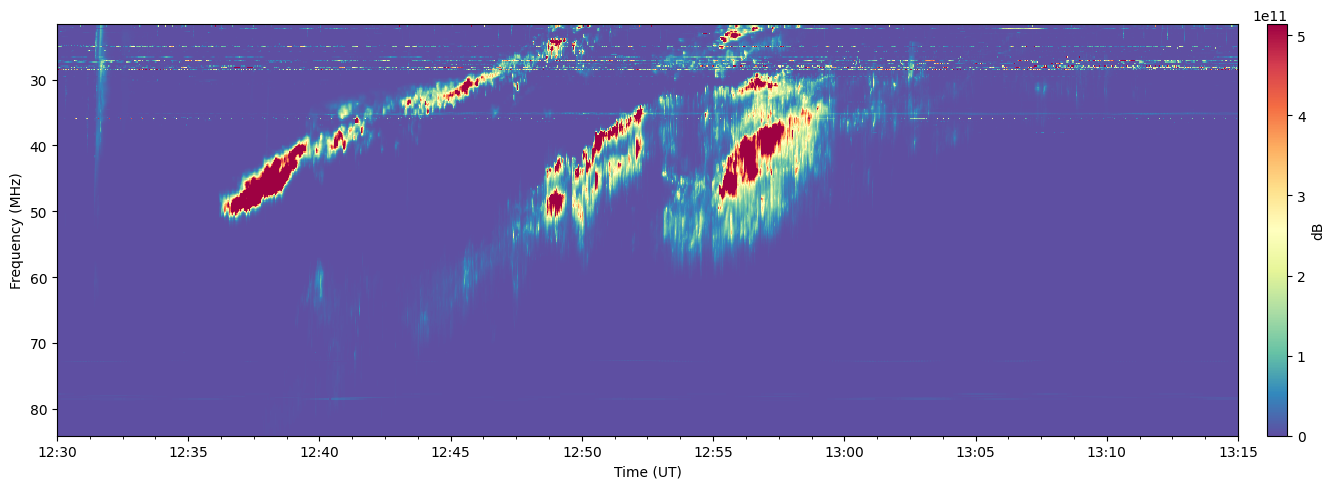

In [96]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(data.time.datetime, data.frequency.value, data_nobkg.T,
                   vmin=0, vmax=vmax,
                   cmap='Spectral_r')
fig.colorbar(pc, ax=ax, pad=0.02, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_minor_locator(AutoMinorLocator(n=4))
ax.set_xlim(left=pd.Timestamp(f'{data.time.datetime[0].date()} 12:30:00'),
            right=pd.Timestamp(f'{data.time.datetime[0].date()} 13:15:00'))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()